In [1]:
import pandas as pd
ageinc_df = pd.read_csv('/Users/Owner/Desktop/ageinc.csv', sep=',')
ageinc_df

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53
...,...,...
995,70615,29
996,95102,41
997,42203,35
998,16975,31


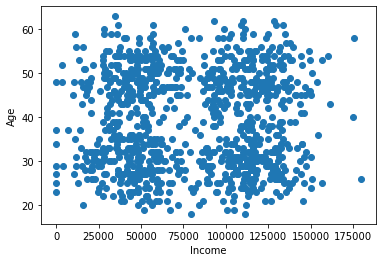

In [2]:
import matplotlib.pyplot as plt  #dibuja los datos se ven cuatro grupos visualmente
%matplotlib inline
plt.scatter(ageinc_df['income'], ageinc_df['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [4]:
ageinc_df['z_income'] = (ageinc_df['income'] - ageinc_df['income'].
mean())/ageinc_df['income'].std()
ageinc_df['z_age'] = (ageinc_df['age'] - ageinc_df['age'].mean())/ageinc_df['age'].std()

In [6]:
ageinc_df

,income,age,z_income,z_age
0,101743,58,0.550812,1.693570
1,49597,27,-0.777331,-1.130565
2,36517,52,-1.110474,1.146963
3,33223,49,-1.194372,0.873660
4,72994,53,-0.181416,1.238064
...,...,...,...,...
995,70615,29,-0.242008,-0.948363
996,95102,41,0.381668,0.144851
997,42203,35,-0.965654,-0.401756
998,16975,31,-1.608203,-0.766161


In [8]:
from sklearn import cluster
colors = ['r', 'b', 'k', 'g', 'm', 'y']
markers = ['^', 'o', 'd', 's', 'P', 'X']

In [2]:
plt.figure(figsize=(12,16)) #crea varios cluters de 2 a 6. for loop saca cada cluster como sub cluster
#el de cuatro grupos se puede ver que es el mejor.
for n in range(2,7):
  model = cluster.KMeans(n_clusters=n, random_state=10)
  ageinc_df['cluster'] = model.fit_predict(ageinc_df[['z_income','z_age']])
plt.subplot(3, 2, n-1)
for c in ageinc_df['cluster'].unique():
    d = ageinc_df[ageinc_df['cluster'] == c]
    plt.scatter(d['income'], d['age'], marker=markers[c], color=colors[c])
plt.show()

NameError: name 'plt' is not defined

In [12]:
ageinc_df

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,4
2,36517,52,-1.110474,1.146963,2
3,33223,49,-1.194372,0.873660,2
4,72994,53,-0.181416,1.238064,2
...,...,...,...,...,...
995,70615,29,-0.242008,-0.948363,4
996,95102,41,0.381668,0.144851,5
997,42203,35,-0.965654,-0.401756,3
998,16975,31,-1.608203,-0.766161,3
